소비에 영향을 주는 독립 변수에는 소득 외에도 자녀의 수, 거주지, 직업 등 다른 요인이 있을 수 있다. 이처럼 **여러 개의 독립 변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 `다중회귀분석`(`Multivariate Regression`)을 사용한다.**

수학적으로는 종속 변수 $Y$와 독립 변수 $X_k$ 간의 관계를 $Y= b + a_1X_1 + a_2X_2 + … + a_nX_n$와 같은 함수식으로 표현한다. 다중회귀분석 알고리즘은 각 독립 변수의 계수($a_1$, $a_2$, $a_3$, $…$ , $a_n$)와 상수항($b$)에 적절한 값들을 찾아서 모델을 완성한다. 모델의 예측값인 종속 변수에 대한 실제 데이터를 알고 있는 상태에서 학습하기 때문에 지도학습으로 분류된다.

# Step 1 ~ Step 5
동일하게 Step 1 ~ Step 5 과정을 거쳐, 독립 변수로 3개의 열을 선택하고 훈련 데이터와 검증 데이터를 분리한다. 훈련 데이터 278개와 검증 데이터 120개로 나뉘고, 각각 3개의 열을 갖는다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'] = df['horsepower'].replace('?', np.nan)  # '?'을 np.nan으로 변경
df['horsepower'] = df['horsepower'].astype('float')  # 문자열을 실수형으로 변환

# 결측치 대체
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X = ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y = ndf['mpg']  #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
# 훈련 데이터:  (278, 3)
print('검증 데이터: ', X_test.shape)
# 검증 데이터:  (120, 3)

훈련 데이터:  (278, 3)
검증 데이터:  (120, 3)


`LinearRegression()` 함수를 사용하여 회귀분석 모델 객체(`lr`)를 생성한다. 앞서 분리한 훈련 데이터(`X_train`, `y_train`)를 `fit()` 메서드에 입력하여 모델을 학습시킨다. 모델 학습이 완료되면 훈련 데이터를 제외한 나머지 검증 데이터(`X_test`, `y_test`)를 사용하여 모델의 평가 지표인 결정계수를 구한다. 

반환된 결정계수 값은 0.6895로 다항회귀분석 때의 0.726보다 낮은 값이다. 모델의 설명력이 나빠졌다고 볼 수 있다.

In [2]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print('R^2 결정계수: ', r_square)
# R^2 결정계수:  0.6895968946794342

R^2 결정계수:  0.6895968946794342


회귀방정식을 구성하는 독립 변수의 계수($a_1$, $a_2$, $a_3$)인 `lr.coef_`와 상수항($b$)을 나타내는 `lr.intercept_`을 찾는다.

In [4]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

# 회귀식의 y절편
print('상수항 b:', lr.intercept_)

X 변수의 계수 a:  [-0.38212538 -0.04709428 -0.00514076]
상수항 b: 46.099484743282304


모델이 예측한 결과와 실제 값을 비교한다. 검증 데이터(`X_test`)를 `predict()` 메서드에 입력하여 예측한 값을 `y_hat_test`에 저장하고 실제 데이터인 `y_test`의 분포와 비교한다.

3개의 독립 변수(`cylinders`, `horsepower`, `weight`)를 구분하여 각기 다른 `Axes` 객체에 시각화하면, `horsepower`와 `weight`의 경우 다중회귀모델이 추정하는 회귀선이 직선 형태가 아니다.

단순선형회귀보다 조금 더 복잡한 관계를 설명할 수 있는 모형이다.

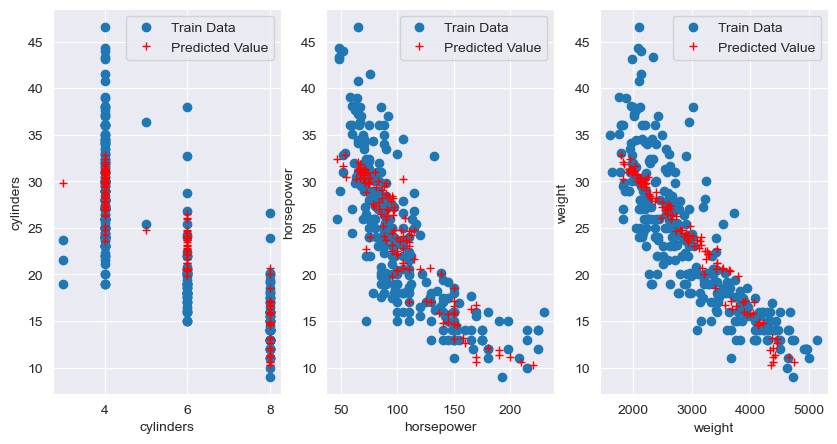

In [5]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = lr.predict(X_test)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, col in enumerate(X_test.columns):
    axes[i].plot(X_train[col], y_train, 'o', label='Train Data')  # 데이터 분포
    axes[i].plot(X_test[col], y_hat_test, 'r+', label='Predicted Value')  # 모형이 학습한 회귀선
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(col)
    axes[i].legend(loc='best')

MSE와 MAE를 계산하고 이전 분석결과와 비교한다. MSE 17.88, MAE 3.33으로 다항회귀분석 때의 MSE 15.81, MAE 3.14 대비 오차가 커졌다. 모델 예측 성능이 나빠졌다고 해석할 수 있다.

In [7]:
# 사이킷런 함수 활용 (평균 제곱 오차)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_hat_test)
print('mse: ', np.round(mse, 2))
# mse:  17.88

# 평균 절대값 오차
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_hat_test)
print('mae: ', np.round(mae, 2))
# mae:  3.33

mse:  17.88
mae:  3.33
